# Liver tumor segmentation with nitrain

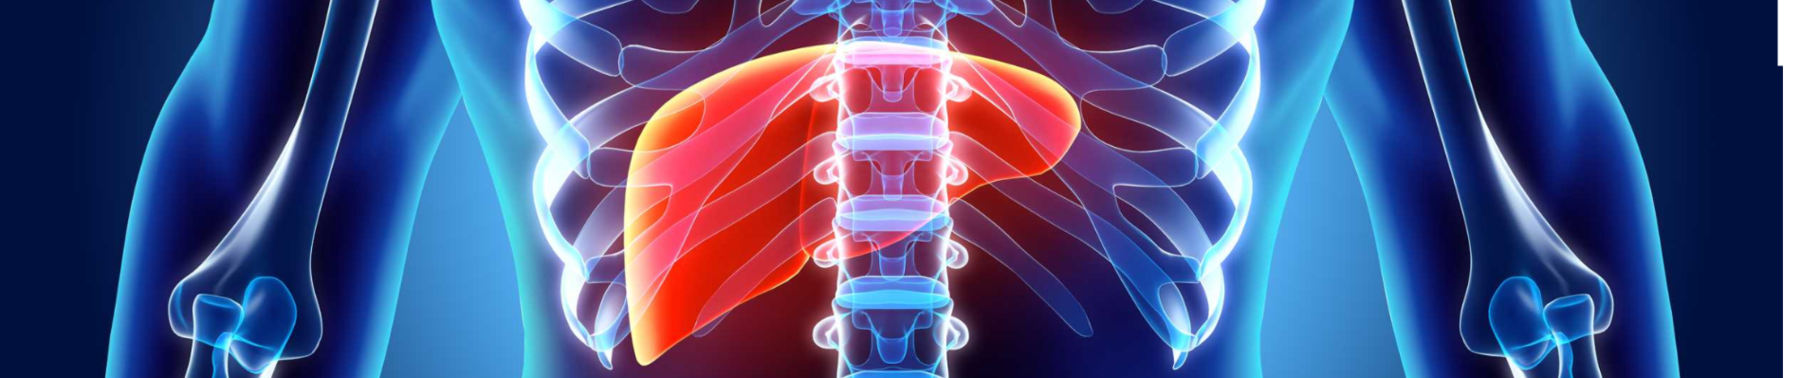

This example shows you how to train a model to perform liver tumor segmentation using nitrain. It is a classic example of medical image segmentation. 

We will create a model with keras and do everything else (data sampling + augmentation, training, explaining results) with nitrain.

## About the data

The dataset can be downloaded from the [Liver Tumor Segmentation](https://www.kaggle.com/datasets/andrewmvd/liver-tumor-segmentation/data) dataset on Kaggle. It is about 5 GB in size and contains 130 CT scans of the liver along with associated segmentation images where tumors have been identified.

To run this example, download the dataset ("archive.zip") and unpack it onto your desktop. Then we are ready to go!

## Creating a dataset instance

Since we have the images in a local folder and they are not in any special format, we can use the `FolderDataset` class to load them into memory. We want to use the raw images as inputs and the segmentated images as outputs.

The data looks like this:

```md
kaggle-liver-ct/
    volumes/
        volume-0.nii
        volume-1.nii
        ...
    sgementations/
        segmentation-0.nii
        segmentation-1.nii
```

Notice in particular how the images follow a specific pattern with the participant id located at the end of the file. We will use this to make sure the volumes and segmentations are correctly matched.

In [2]:
from nitrain.datasets import FolderDataset

dataset = FolderDataset('~/Desktop/kaggle-liver-ct',
                        x={'pattern': 'volumes/volume-{id}.nii'},
                        y={'pattern': 'segmentations/segmentation-{id}.nii'})
x, y = dataset[0]
print(x)
print(y)

ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (512, 512, 75)
	 Spacing    : (0.7031, 0.7031, 5.0)
	 Origin     : (-172.9, 179.2969, -368.0)
	 Direction  : [ 1.  0.  0.  0. -1.  0.  0.  0.  1.]

/Users/ni5875cu/Desktop/kaggle-liver-ct/segmentations/segmentation-0.nii
